## Convolutional Neural Network Assignment: Image Classification on CIFAR 10
In this assignment, you will design and implement a CNN model in Keras. We will use the CIFAR-10. Please note you **only need to use 1000 training examples** (CPU is much slower than GPU so we do not use the full dataset). Please complete the rest of the notebook by doing following tasks.

- Build your network. Your network should have **at least 2 convolutional layers, 1 max pooling layer and 1 fully connected layer**
- Train your network. Use Keras to train your network based on your network structure. Describe your training procedure. Plot the following:
    1. Training and validation loss vs. training iterations.
    2. Training and validation accuracy vs. training iterations.
- Report a final test result on 100 testing examples.
- Give detailed explanation of your code


- *Bonus*: you can use more train/test data to build a stronger model

You may want to check [Keras documentation](http://keras.io) for reference.

In [1]:
# some setup code
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, AveragePooling2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np

# A bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)

('X_train shape:', (50000, 32, 32, 3))


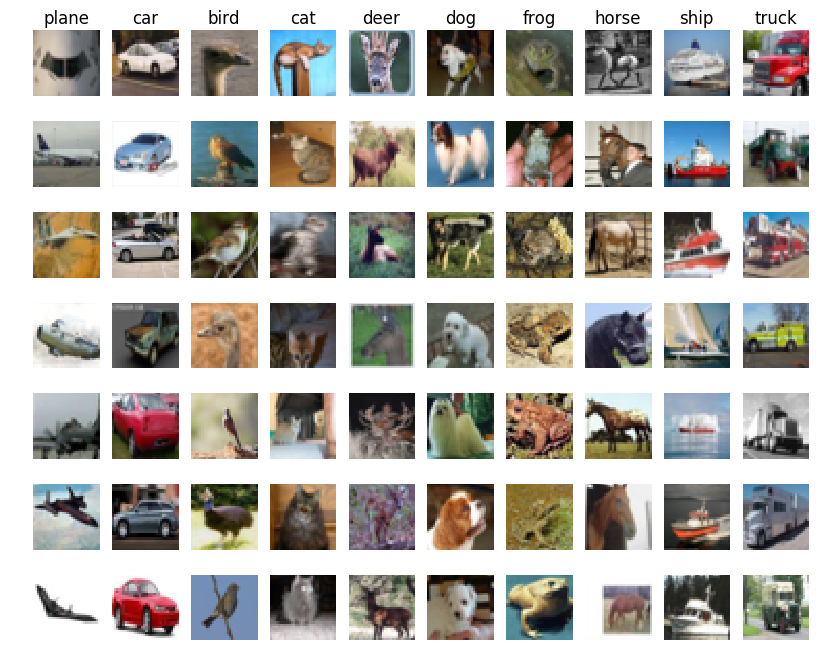

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 100
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# because Keras wants something called "one-hot" (https://en.wikipedia.org/wiki/One-hot) to be labels
nb_classes = 10
Y_train = to_categorical(y_train, num_classes=nb_classes)
Y_test = to_categorical(y_test, num_classes=nb_classes)

(5000, 'train samples')
(100, 'test samples')


### Please complete the rest of the notebook: Build and Train A CNN Model
Remember we are training on a very small subset of CIFAR 10, so it is easy to overfit!

In [5]:
batch_size = 32 
nb_epoch = 30

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

model = Sequential()

### PLEASE PUT YOUR CODE HERE!
### Add Convolution, Activation and Pooling layers, compile your model, and fit it.

kwargs = {'kernel_size' : 3, 'padding' : 'same', 'activation' : 'relu', 'kernel_initializer' : 'glorot_uniform'}
model.add(Convolution2D(filters=16, input_shape=(32, 32, 3), **kwargs))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=32, **kwargs))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, **kwargs))
model.add(AveragePooling2D(pool_size=8))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch)

Epoch 1/30
5000/5000 [==============================] - 4s - loss: 2.6747 - acc: 0.2210     
Epoch 2/30
5000/5000 [==============================] - 4s - loss: 1.7883 - acc: 0.3416     
Epoch 3/30
5000/5000 [==============================] - 3s - loss: 1.6797 - acc: 0.3908     
Epoch 4/30
5000/5000 [==============================] - 3s - loss: 1.5710 - acc: 0.4316     
Epoch 5/30
5000/5000 [==============================] - 3s - loss: 1.4709 - acc: 0.4678     
Epoch 6/30
5000/5000 [==============================] - 3s - loss: 1.4211 - acc: 0.4882     
Epoch 7/30
5000/5000 [==============================] - 3s - loss: 1.3648 - acc: 0.5002     
Epoch 8/30
5000/5000 [==============================] - 3s - loss: 1.3093 - acc: 0.5224     
Epoch 9/30
5000/5000 [==============================] - 3s - loss: 1.2797 - acc: 0.5400     
Epoch 10/30
5000/5000 [==============================] - 3s - loss: 1.2168 - acc: 0.5584     
Epoch 11/30
5000/5000 [==============================] - 3s - loss: 1

### Test your model on test set

In [6]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 1.1383711540699004)
('Test accuracy:', 0.64000000000000001)
